## Homework 7
Submitted by: Sriniketh Shankar (121113580)

Solution for Question 1:

Optimal point using Newton's method: [-0.47552448 -1.45804196  0.53496503]
Minimum objective value: -4.687062937062936
Newton's method took 2 iterations

Optimal points found by each method:
Gradient Descent: [-0.47575085 -1.45762928  0.5348242 ]
Conjugate Gradient: [-0.47552448 -1.45804196  0.53496503]
Newton's Method: [-0.47552448 -1.45804196  0.53496503]
DFP Method: [-0.47552448 -1.45804196  0.53496503]
BFGS Method: [-0.47552448 -1.45804196  0.53496503]

Analytical solution: [-0.47552448 -1.45804196  0.53496503]
Objective value at analytical solution: -4.6870629370629375


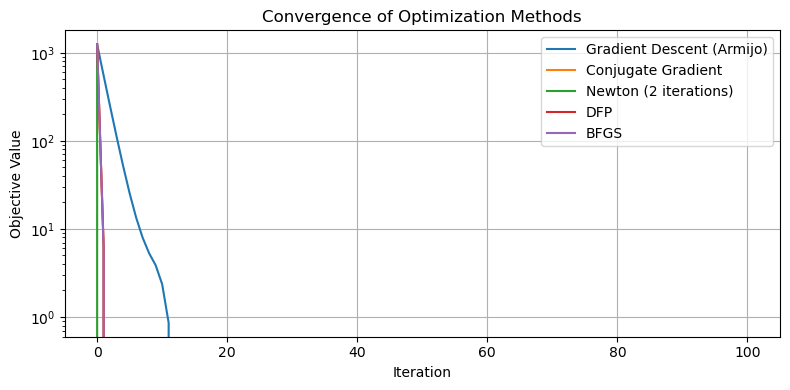

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the problem parameters
P = np.array([[5, 4, 6], [4, 9, 15], [6, 15, 35]])
q = np.array([5, 7, 6])
x0 = np.array([2, 4, 6])

# Function to compute the objective function value
def objective(x):
    return 0.5 * x.T @ P @ x + q.T @ x

# Function to compute the gradient
def gradient(x):
    return P @ x + q

# Function to check if a point satisfies Armijo condition
def armijo_condition(x, d, alpha, beta, grad):
    return objective(x + alpha * d) <= objective(x) + beta * alpha * grad.T @ d

# (a) Gradient Descent with Armijo Backtracking Line Search
def gradient_descent_armijo(x0, alpha_init=2.0, gamma=0.5, beta=0.8, max_iter=100, tol=1e-6):
    x = x0.copy()
    f_values = [objective(x)]
    
    for k in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < tol:
            break
        
        # Descent direction (negative gradient)
        d = -grad
        
        # Armijo backtracking line search
        alpha = alpha_init
        while not armijo_condition(x, d, alpha, beta, grad):
            alpha *= gamma
        
        # Update x
        x = x + alpha * d
        f_values.append(objective(x))
    
    return x, f_values

# (b) Conjugate Gradient Method
def conjugate_gradient(x0, max_iter=100, tol=1e-6):
    x = x0.copy()
    f_values = [objective(x)]
    
    r = -gradient(x)  # Initial residual
    d = r.copy()      # Initial direction
    
    for k in range(max_iter):
        if np.linalg.norm(r) < tol:
            break
        
        # Compute step size
        alpha = r.T @ r / (d.T @ P @ d)
        
        # Update x
        x = x + alpha * d
        f_values.append(objective(x))
        
        # Update residual
        r_new = r - alpha * P @ d
        
        # Compute beta
        beta = (r_new.T @ r_new) / (r.T @ r)
        
        # Update direction
        d = r_new + beta * d
        r = r_new
    
    return x, f_values

# (c) Newton's Method
def newton_method(x0, max_iter=100, tol=1e-6):
    x = x0.copy()
    f_values = [objective(x)]
    
    for k in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < tol:
            break
        
        # Newton direction: d = -H^(-1)g where H is the Hessian and g is the gradient
        # For quadratic functions, the Hessian is simply P
        d = -np.linalg.solve(P, grad)
        
        # Step size (for quadratic functions, alpha=1 is optimal)
        alpha = 1.0
        
        # Update x
        x = x + alpha * d
        f_values.append(objective(x))
    
    return x, f_values, k+1  # Return iterations needed

# (d) DFP Method
def dfp_method(x0, max_iter=100, tol=1e-6):
    n = len(x0)
    x = x0.copy()
    H = np.eye(n)  # Initial approximation of inverse Hessian
    f_values = [objective(x)]
    
    for k in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < tol:
            break
        
        # Search direction
        d = -H @ grad
        
        # Line search (using a simple approach for quadratic functions)
        alpha = -(grad.T @ d) / (d.T @ P @ d)
        
        # Update x
        x_new = x + alpha * d
        f_values.append(objective(x_new))
        
        # Compute gradient difference
        grad_new = gradient(x_new)
        y = grad_new - grad
        s = alpha * d
        
        # Update H (DFP formula)
        Hy = H @ y
        if s.T @ y > 1e-10:  # Safeguard against division by zero
            H = H - np.outer(Hy, Hy) / (y.T @ Hy) + np.outer(s, s) / (y.T @ s)
        
        x = x_new
    
    return x, f_values

# (e) BFGS Method
def bfgs_method(x0, max_iter=100, tol=1e-6):
    n = len(x0)
    x = x0.copy()
    H = np.eye(n)  # Initial approximation of inverse Hessian
    f_values = [objective(x)]
    
    for k in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < tol:
            break
        
        # Search direction
        d = -H @ grad
        
        # Line search (using a simple approach for quadratic functions)
        alpha = -(grad.T @ d) / (d.T @ P @ d)
        
        # Update x
        x_new = x + alpha * d
        f_values.append(objective(x_new))
        
        # Compute gradient difference
        grad_new = gradient(x_new)
        y = grad_new - grad
        s = alpha * d
        
        # Update H (BFGS formula)
        if s.T @ y > 1e-10:  # Safeguard against division by zero
            rho = 1.0 / (y.T @ s)
            I = np.eye(n)
            H = (I - rho * np.outer(s, y)) @ H @ (I - rho * np.outer(y, s)) + rho * np.outer(s, s)
        
        x = x_new
    
    return x, f_values

# Run all methods
x_gd, f_gd = gradient_descent_armijo(x0)
x_cg, f_cg = conjugate_gradient(x0)
x_newton, f_newton, newton_iters = newton_method(x0)
x_dfp, f_dfp = dfp_method(x0)
x_bfgs, f_bfgs = bfgs_method(x0)

# Plot results
plt.figure(figsize=(8, 4))
plt.plot(f_gd, label='Gradient Descent (Armijo)')
plt.plot(f_cg, label='Conjugate Gradient')
plt.plot(f_newton, label=f'Newton ({newton_iters} iterations)')
plt.plot(f_dfp, label='DFP')
plt.plot(f_bfgs, label='BFGS')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Convergence of Optimization Methods')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.tight_layout()

print(f"Optimal point using Newton's method: {x_newton}")
print(f"Minimum objective value: {f_newton[-1]}")
print(f"Newton's method took {newton_iters} iterations")

# Checking that all methods converged to the same solution
print("\nOptimal points found by each method:")
print(f"Gradient Descent: {x_gd}")
print(f"Conjugate Gradient: {x_cg}")
print(f"Newton's Method: {x_newton}")
print(f"DFP Method: {x_dfp}")
print(f"BFGS Method: {x_bfgs}")

# verifying that our solution is correct
# The analytical solution for this unconstrained problem is x* = -P^(-1)q
x_analytical = -np.linalg.solve(P, q)
print(f"\nAnalytical solution: {x_analytical}")
print(f"Objective value at analytical solution: {objective(x_analytical)}")


Solution for question 2


Problem 2 - Dual Ascent Results:
Optimal point: [ 0.40038329 -1.30351658  0.24046845]
Final objective value: -2.832750409819126
Final dual variables: [-1.07478705  0.81678087]
Constraint satisfaction: 0.479391497771073


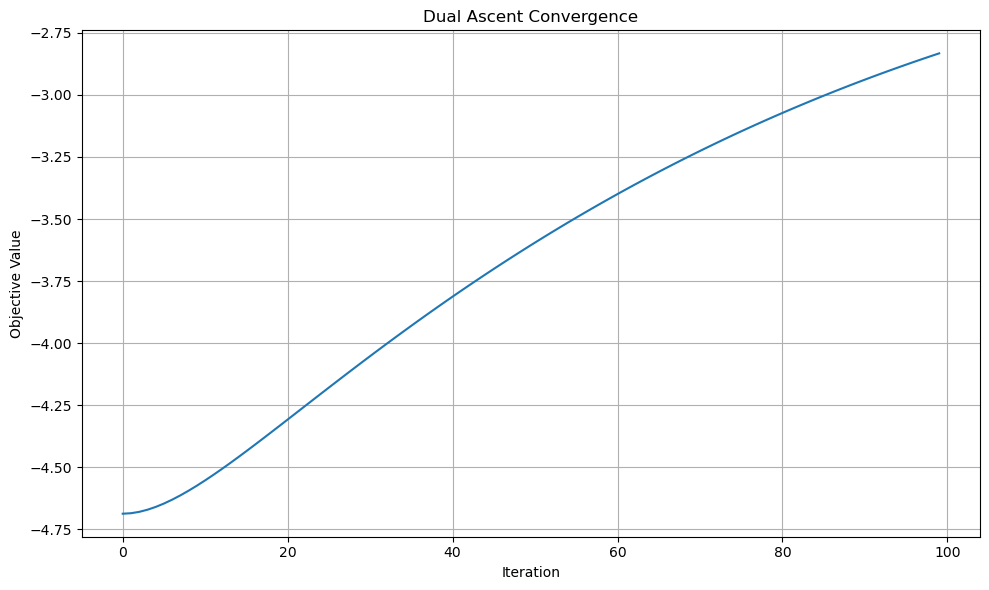

In [10]:
# Now let's solve Problem 2 using Dual Ascent

# Define the problem parameters for Problem 2
A = np.array([[4, 0.9, 2], [1.3, 0.6, 6]])
b = np.array([1.2, 0.8])
nu0 = np.array([0, 0])

def dual_ascent(P, q, A, b, nu0, max_iter=100, alpha=0.01, tol=1e-6):
    nu = nu0.copy()
    x_values = []
    f_values = []
    
    for k in range(max_iter):
        # Solve the unconstrained problem for x
        x = -np.linalg.solve(P, q + A.T @ nu)
        x_values.append(x)
        f_values.append(objective(x))
        
        # Check constraint satisfaction
        c = A @ x - b
        if np.linalg.norm(c) < tol:
            break
        
        # Update dual variables
        nu = nu + alpha * c
    
    return x_values[-1], f_values, nu

# Run dual ascent
x_dual, f_dual, nu_final = dual_ascent(P, q, A, b, nu0)

print("\nProblem 2 - Dual Ascent Results:")
print(f"Optimal point: {x_dual}")
print(f"Final objective value: {objective(x_dual)}")
print(f"Final dual variables: {nu_final}")
print(f"Constraint satisfaction: {np.linalg.norm(A @ x_dual - b)}")

plt.figure(figsize=(10, 6))
plt.plot(f_dual)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Dual Ascent Convergence')
plt.grid(True)
plt.tight_layout()